In [3]:
using Pkg
Pkg.add("Images")
Pkg.add("ImageFiltering")
Pkg.add("TestImages")
Pkg.add("ImageShow")
Pkg.add("ImageTransformations")

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
    Updating `~/Project.toml`
  [4e3cecfd] + ImageShow v0.3.3
  No Changes to `~/Manifest.toml`
   Resolving package versions...
    Updating `~/Project.toml`
  [02fcd773] + ImageTransformations v0.9.4
  No Changes to `~/Manifest.toml`


Gray{Float64}(917.4156862745099)


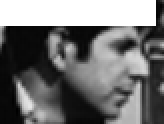

In [18]:
using TestImages
using Images
using ImageFiltering
using ImageShow
im = testimage("cam")
im = Gray.(im)
#imgg = imfilter(im, reflect(Kernel.gaussian(5)));
imf = im[100:160,190:270]
im[100:112,180:267] .= 1.0
imgg = im
sz = size(imf)
minn = Inf
tup = (0,0)
for x ∈ 1:size(imgg)[1]
    for y ∈ 1:size(imgg)[2]
        try 
            if sum(imgg[x:x+sz[1]-1,y:y+sz[2]-1] .- imf) < minn
                minn = sum(imgg[x:x+sz[1]-1,y:y+sz[2]-1] .- imf)
                global tup = (x,y)
            end
        catch
            continue
        end
    end
end
println(minn)
imgg[tup[1]:tup[1]+sz[1],tup[2]:tup[2]+sz[2]]  
            

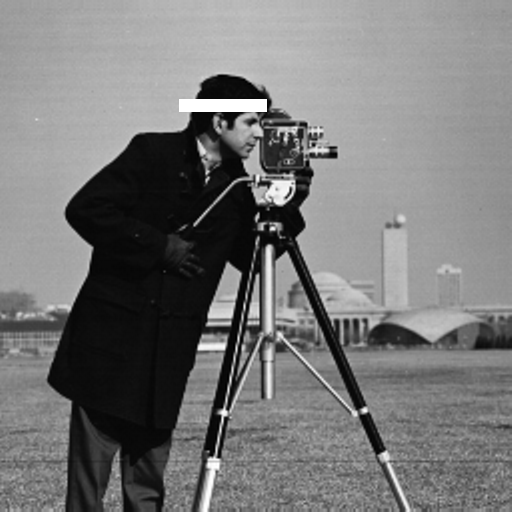

In [19]:
imgg

In [10]:
tst_im = rand(5,5)
@view tst_im[:,:]

5×5 view(::Matrix{Float64}, :, :) with eltype Float64:
 0.103417  0.955192  0.289268  0.188227   0.829243
 0.778976  0.308172  0.475554  0.0227875  0.314082
 0.285392  0.860942  0.457206  0.0944368  0.814898
 0.818407  0.184738  0.366024  0.748617   0.549875
 0.990151  0.378285  0.924384  0.567616   0.388834

In [56]:
RGB(1.0,0.0,0.0)
RGB.(tst_im)
im_rgb = rand(RGB,5,5)
Gray.(im_rgb)
size(im_rgb)

(5, 5)